# 日経平均株価 日足

In [1]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import yfinance as yf

symbol = '^N225'
ticker = yf.Ticker(symbol)

#df = ticker.history(period='1y', start='2024-01-01', end='2024-12-31') # All data in 2024
df = ticker.history(period='6mo')  # All data in 2024
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-08-07 00:00:00+09:00,34122.351562,35849.769531,33739.460938,35089.621094,242800000,0.0,0.0
2024-08-08 00:00:00+09:00,34645.789062,35379.648438,34207.160156,34831.148438,165300000,0.0,0.0
2024-08-09 00:00:00+09:00,35272.339844,35671.308594,34445.570312,35025.000000,176900000,0.0,0.0
2024-08-13 00:00:00+09:00,35490.578125,36232.511719,35476.789062,36232.511719,140700000,0.0,0.0
2024-08-14 00:00:00+09:00,36535.601562,36683.890625,36074.710938,36442.429688,135600000,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-03 00:00:00+09:00,38932.660156,38948.609375,38401.820312,38520.089844,169200000,0.0,0.0
2025-02-04 00:00:00+09:00,39078.660156,39192.511719,38590.960938,38798.371094,144300000,0.0,0.0
2025-02-05 00:00:00+09:00,38979.210938,39118.949219,38682.179688,38831.480469,151200000,0.0,0.0


In [2]:
df0 = ticker.history(period='1y')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-02-07 00:00:00+09:00,36002.988281,36195.500000,35854.628906,36119.921875,126500000,0.0,0.0
2024-02-08 00:00:00+09:00,36258.839844,36956.968750,36206.199219,36863.281250,151000000,0.0,0.0
2024-02-09 00:00:00+09:00,36915.441406,37287.261719,36807.031250,36897.421875,146800000,0.0,0.0
2024-02-13 00:00:00+09:00,37248.359375,38010.691406,37184.101562,37963.968750,140500000,0.0,0.0
2024-02-14 00:00:00+09:00,37712.871094,37825.851562,37594.468750,37703.320312,120300000,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-03 00:00:00+09:00,38932.660156,38948.609375,38401.820312,38520.089844,169200000,0.0,0.0
2025-02-04 00:00:00+09:00,39078.660156,39192.511719,38590.960938,38798.371094,144300000,0.0,0.0
2025-02-05 00:00:00+09:00,38979.210938,39118.949219,38682.179688,38831.480469,151200000,0.0,0.0


## 日足チャートと Bollinger's bands

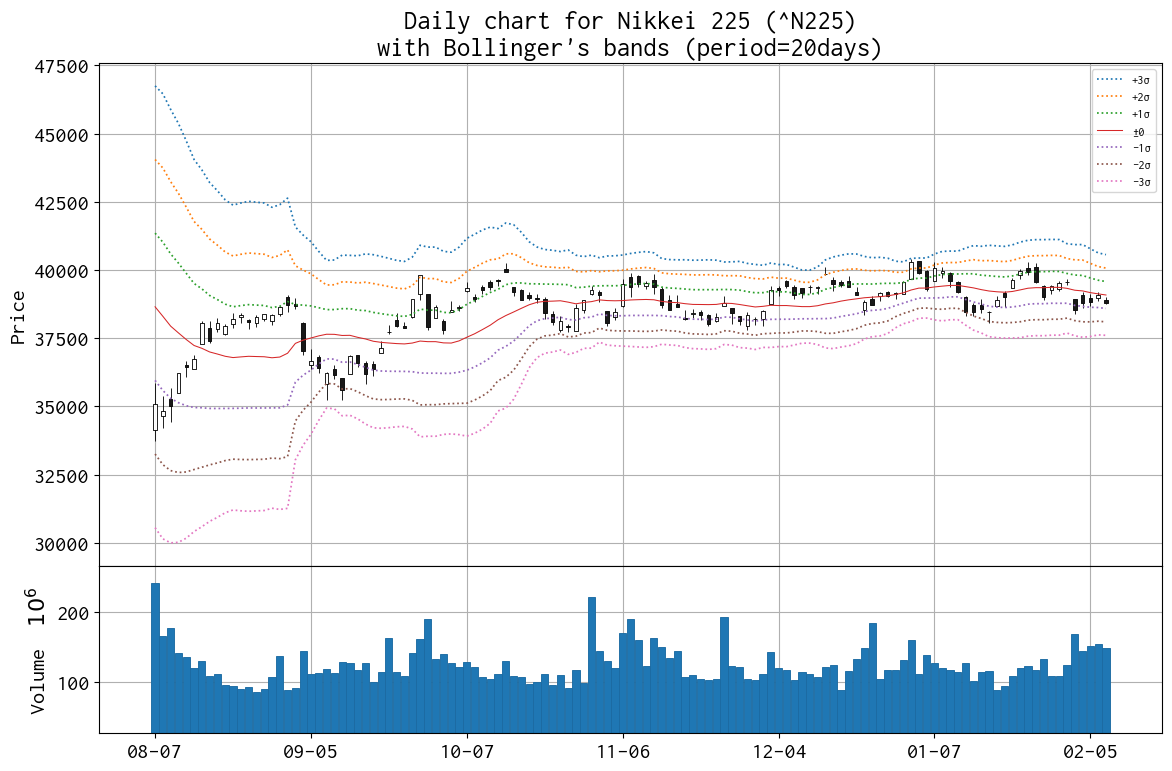

In [3]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

# Bollinger bands
period = 20
r = df0['Close'].rolling(period)    
band_upper3 = r.mean() + 3 * r.std()
band_upper2 = r.mean() + 2 * r.std()
band_upper1 = r.mean() + 1 * r.std()
band_mean = r.mean()
band_lower1 = r.mean() - 1 * r.std()
band_lower2 = r.mean() - 2 * r.std()
band_lower3 = r.mean() - 3 * r.std()

apds  = [
    mpf.make_addplot(band_upper3[df.index], width=1.25, color='C0', linestyle='dotted', label='+3σ', ax=ax[0]),
    mpf.make_addplot(band_upper2[df.index], width=1.25, color='C1', linestyle='dotted', label='+2σ', ax=ax[0]),
    mpf.make_addplot(band_upper1[df.index], width=1.25, color='C2', linestyle='dotted', label='+1σ', ax=ax[0]),
    mpf.make_addplot(band_mean[df.index], width=0.75, color='C3', label='±0', ax=ax[0]),
    mpf.make_addplot(band_lower1[df.index], width=1.25, color='C4', linestyle='dotted', label='-1σ', ax=ax[0]),
    mpf.make_addplot(band_lower2[df.index], width=1.25, color='C5', linestyle='dotted', label='-2σ', ax=ax[0]),
    mpf.make_addplot(band_lower3[df.index], width=1.25, color='C6', linestyle='dotted', label='-3σ', ax=ax[0]),
]   

mpf.plot(
    df,
    type='candle',
    style='default',
    volume=ax[1],
    datetime_format='%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax[0],
)

try:
    ax[0].set_title('Daily chart for %s (%s)\nwith Bollinger\'s bands (period=20days)' % (ticker.info['longName'], symbol))
except KeyError:
    ax[0].set_title('Daily chart for %s\nwith Bollinger\'s bands (period=20days)' % symbol)

ax[0].legend(loc='best', fontsize=9)

plt.tight_layout()
plt.savefig('daily_chart_bollinger_n225.png')
plt.show()

In [4]:
len(df)

123

In [5]:
df.tail(2)['Close']

Date
2025-02-06 00:00:00+09:00    39066.531250
2025-02-07 00:00:00+09:00    38787.019531
Name: Close, dtype: float64

In [6]:
df.tail(2)['Close'].diff()

Date
2025-02-06 00:00:00+09:00           NaN
2025-02-07 00:00:00+09:00   -279.511719
Name: Close, dtype: float64

In [7]:
df['Close'].rolling(25).mean()

Date
2024-08-07 00:00:00+09:00             NaN
2024-08-08 00:00:00+09:00             NaN
2024-08-09 00:00:00+09:00             NaN
2024-08-13 00:00:00+09:00             NaN
2024-08-14 00:00:00+09:00             NaN
                                 ...     
2025-02-03 00:00:00+09:00    39323.698438
2025-02-04 00:00:00+09:00    39314.159219
2025-02-05 00:00:00+09:00    39302.201250
2025-02-06 00:00:00+09:00    39282.140156
2025-02-07 00:00:00+09:00    39222.374531
Name: Close, Length: 123, dtype: float64

In [8]:
df['Close'].rolling(75).mean()

Date
2024-08-07 00:00:00+09:00             NaN
2024-08-08 00:00:00+09:00             NaN
2024-08-09 00:00:00+09:00             NaN
2024-08-13 00:00:00+09:00             NaN
2024-08-14 00:00:00+09:00             NaN
                                 ...     
2025-02-03 00:00:00+09:00    39030.889531
2025-02-04 00:00:00+09:00    39020.123802
2025-02-05 00:00:00+09:00    39005.736198
2025-02-06 00:00:00+09:00    39004.219271
2025-02-07 00:00:00+09:00    39002.563646
Name: Close, Length: 123, dtype: float64

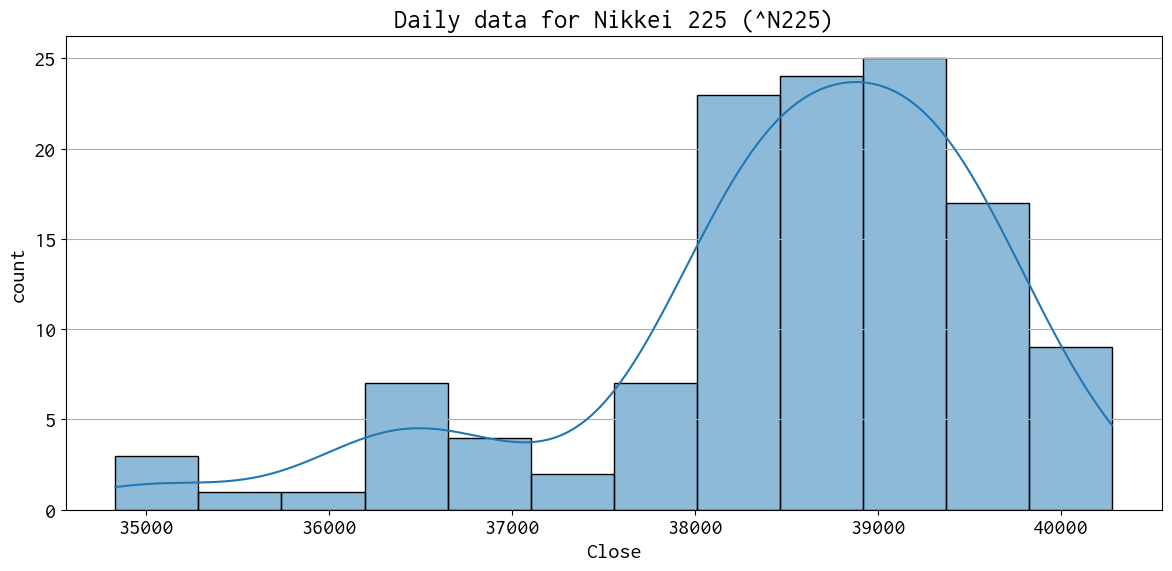

In [9]:
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

sns.histplot(
    df['Close'],
    kde=True,
    ax=ax
)

ax.set_xlabel("Close")
ax.set_ylabel("count")
ax.set_title('Daily data for %s (%s)' % (ticker.info['longName'], symbol))
ax.grid(axis = 'y')

plt.tight_layout()
plt.savefig('daily_histogram_n225.png')
plt.show()

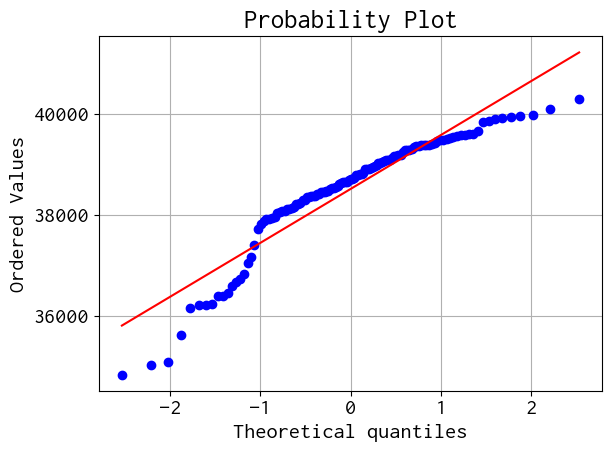

In [10]:
# Q-Qプロットの描画
stats.probplot(df['Close'], dist="norm", plot=plt)
plt.grid()

plt.tight_layout()
plt.savefig('daily_qqplot_n225.png')
plt.show()

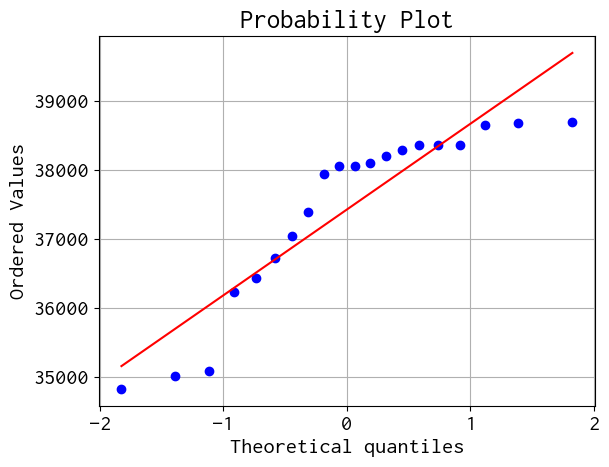

In [11]:
# Q-Qプロットの描画
stats.probplot(df.iloc[0:20]['Close'], dist="norm", plot=plt)

plt.grid()
plt.show()

In [12]:
len(df)

123

In [13]:
stat, pval = stats.shapiro(df['Close'])
print('Shapiro-Wilk test statistic: %.3f, p-value: %.3f' % (stat, pval))

Shapiro-Wilk test statistic: 0.893, p-value: 0.000


In [14]:
stat, pval = stats.shapiro(df.iloc[0:20]['Close'])
print('Shapiro-Wilk test statistic: %.3f, p-value: %.3f' % (stat, pval))

Shapiro-Wilk test statistic: 0.832, p-value: 0.003


In [15]:
res = stats.anderson(df['Close'])

In [16]:
print('%.3f' % res.statistic)

4.040


In [17]:
print(res.critical_values)

[0.559 0.636 0.763 0.891 1.059]


In [18]:
print(res.significance_level)

[15.  10.   5.   2.5  1. ]


In [19]:
res = stats.anderson(df.iloc[0:20]['Close'])

In [20]:
print('%.3f' % res.statistic)

1.316


In [21]:
print(res.critical_values)

[0.506 0.577 0.692 0.807 0.96 ]


In [22]:
print(res.significance_level)

[15.  10.   5.   2.5  1. ]
